In [1]:
import os
import pandas as pd
import numpy as np
import jax
import jax.numpy as jnp
import tensorflow as tf
import tensorflow_probability.substrates.jax as tfp
from astropy.table import Table

2023-08-07 16:00:45.258391: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tfd = tfp.distributions
rng = jax.random.PRNGKey(0)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
from lcmcmc.preprocessing import add_object_band_index, preprocess_SNANA, extract_subsample

In [4]:
from lcmcmc.utils import get_data_dir_path

In [5]:
train_data_head_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/train_final_master_HEAD.FITS'
train_data_phot_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/train_final_master_PHOT.FITS'

In [6]:
df_head = Table.read(train_data_head_path, format='fits').to_pandas()
df_phot = Table.read(train_data_phot_path, format='fits').to_pandas()

In [7]:
np.unique(df_phot["PHOTFLAG"])

array([     0,   4096,   6144, 999999], dtype=int32)

In [8]:
df_phot = df_phot[(df_phot["PHOTFLAG"] == 4096) | (df_phot["PHOTFLAG"] == 999999)]

In [9]:
df_phot["SNID"]

0           5081715
1           5081715
2           6596653
3           6596653
4           6596653
             ...   
1616081    33259310
1616082    33259310
1616084    33259310
1616207    54214877
1616227    54214877
Name: SNID, Length: 256367, dtype: int64

In [10]:
df_phot["PHOTFLAG"]

0          999999
1          999999
2          999999
3          999999
4          999999
            ...  
1616081      4096
1616082      4096
1616084      4096
1616207      4096
1616227      4096
Name: PHOTFLAG, Length: 256367, dtype: int32

In [11]:
np.amin(df_phot['FLUXCALERR'])

40.52946090698242

# Load data

In [12]:
df_head, df_phot=extract_subsample(df_head=df_head, df_phot=df_phot, event_type="random", num_sample=10)

In [13]:
df_phot

,SNID,FLUXCAL,FLUXCALERR,FLT,MJD,FIELD,PHOTFLAG,PHOTPROB,PSF_SIG1,SKY_SIG,ZEROPT,SIM_MAGOBS
391093,33811018,501.294067,47.085861,b'g',57683.2578,b'499',4096,0.0,0.89,26.139999,28.180000,20.806391
391095,33811018,453.925018,50.161476,b'r',57689.2150,b'499',4096,0.0,0.89,41.889999,28.590000,20.689682
391096,33811018,463.037842,47.872204,b'g',57689.2356,b'499',4096,0.0,0.89,27.040001,28.190001,20.693523
391097,33811018,318.888702,45.584381,b'g',57692.2479,b'499',4096,0.0,0.90,25.840000,28.190001,21.032642
391098,33811018,401.631958,52.124119,b'r',57692.2570,b'499',4096,0.0,0.90,44.580002,28.620001,20.922112
...,...,...,...,...,...,...,...,...,...,...,...,...
1487077,92721239,10146.963867,404.533447,b'r',57689.0922,b'762',4096,0.0,1.06,43.570000,28.500000,13.506950
1487078,92721239,-2955.614746,377.494385,b'g',57689.1188,b'762',4096,0.0,1.15,37.599998,28.420000,13.727317
1487079,92721239,-25635.041016,387.648987,b'r',57692.1004,b'762',4096,0.0,1.11,47.459999,28.590000,13.610905
1487080,92721239,3268.618652,393.263397,b'r',57699.0964,b'762',4096,0.0,1.17,58.189999,28.559999,13.528033


In [14]:
df_phot = add_object_band_index(df_phot, bands=[b'g', b'r'])

In [15]:
df_phot

,SNID,FLUXCAL,FLUXCALERR,FLT,MJD,FIELD,PHOTFLAG,PHOTPROB,PSF_SIG1,SKY_SIG,ZEROPT,SIM_MAGOBS,object_index,band_index
391093,33811018,501.294067,47.085861,b'g',57683.2578,b'499',4096,0.0,0.89,26.139999,28.180000,20.806391,0,0
391095,33811018,453.925018,50.161476,b'r',57689.2150,b'499',4096,0.0,0.89,41.889999,28.590000,20.689682,0,1
391096,33811018,463.037842,47.872204,b'g',57689.2356,b'499',4096,0.0,0.89,27.040001,28.190001,20.693523,0,0
391097,33811018,318.888702,45.584381,b'g',57692.2479,b'499',4096,0.0,0.90,25.840000,28.190001,21.032642,0,0
391098,33811018,401.631958,52.124119,b'r',57692.2570,b'499',4096,0.0,0.90,44.580002,28.620001,20.922112,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487077,92721239,10146.963867,404.533447,b'r',57689.0922,b'762',4096,0.0,1.06,43.570000,28.500000,13.506950,9,1
1487078,92721239,-2955.614746,377.494385,b'g',57689.1188,b'762',4096,0.0,1.15,37.599998,28.420000,13.727317,9,0
1487079,92721239,-25635.041016,387.648987,b'r',57692.1004,b'762',4096,0.0,1.11,47.459999,28.590000,13.610905,9,1
1487080,92721239,3268.618652,393.263397,b'r',57699.0964,b'762',4096,0.0,1.17,58.189999,28.559999,13.528033,9,1


In [16]:
new_object_df = preprocess_SNANA(df_head=df_head, df_phot=df_phot, bands=[b'g', b'r'], norm_band_index=None)

In [17]:
new_object_df = new_object_df[(new_object_df["time"].values>-20) & (new_object_df["time"].values<50)]

# Load PCs

In [18]:
from kndetect.utils import load_pcs

pcs = load_pcs()

# Create joint distribution model

In [19]:
from lcmcmc.model import jd_model_pcs
from lcmcmc.parametric_fits import parametric_fn_pcs

NOTE that the flux values are normalized. 
To get the actual values, multiply flux and fluxerr columns with norm_factor

In [20]:
mu = np.load(os.path.join(get_data_dir_path(), "mu.npy"))
scale = np.load(os.path.join(get_data_dir_path(), "scale.npy"))

In [21]:
index = np.zeros((len(new_object_df), 2), dtype=np.int32)

index[:, 0] = np.asarray(new_object_df["object_index"].values)
index[:, 1] = np.asarray(new_object_df["band_index"].values)

x_range = jnp.asarray(new_object_df["time"])

observed_value = jnp.array(np.asarray(new_object_df["flux"]), dtype=jnp.float32)
observed_sigma = jnp.array(np.asarray(new_object_df["fluxerr"]), dtype=jnp.float32)

jd = jd_model_pcs(index, x_range, pcs, mu, scale)

In [22]:
x_range

Array([  0.    ,   5.9778,   8.9901,   0.    ,   3.042 ,   7.9739,
         0.    ,   0.    ,   0.    ,   7.8762,  15.8712, -19.8379,
        -5.9621,   0.    ,   4.0424,   7.0583,  -9.914 ,  -6.8974,
        -4.0425,   0.    ,   3.0052,   9.0224,   0.    ,   3.0221,
       -13.9274,  -8.9384,  -5.9673,  -2.9893,   0.    ,   5.0718,
        12.9765,  15.981 ,  19.0061,  25.9765,  29.9703,  32.9472,
        47.8751, -15.9585, -13.0445, -10.0008,  -7.0517,  -3.9911,
         0.    ,   3.9801,   6.9106,  17.8996,  21.9576,  24.9262,
        27.9462,  32.9042,  35.8923,  38.9557, -11.0324,  -4.9844,
         0.    ,   2.9728,  -6.0288,   0.    ,   4.9601,   7.972 ,
        10.9753,  25.9185,  28.9172,  38.9423, -18.0209,  -5.9986,
         0.    , -13.9779, -10.9995,  -5.0013,   0.    , -10.88  ,
        -7.9613,  -2.9601,   0.    ,   6.9604,  13.0381,  16.0612,
        22.0004,  24.9062,  28.0396,  30.8644,  33.873 ,  36.9341,
        39.9535,  42.8759,  45.9335,  48.8928, -15.9381, -12.0

In [23]:
observed_sigma

Array([0.09392862, 0.09549725, 0.09093341, 0.11050609, 0.1148298 ,
       0.10036023, 0.11193871, 0.17619473, 0.11454669, 0.0676382 ,
       0.07760616, 0.08562071, 0.14578968, 0.08732957, 0.08463972,
       0.08770373, 0.13603437, 0.09512885, 0.07691201, 0.07045414,
       0.07084096, 0.09599761, 0.02645469, 0.02399227, 0.1081384 ,
       0.08371363, 0.08201414, 0.08343894, 0.08228433, 0.12804465,
       0.13104607, 0.08297005, 0.08334959, 0.08502108, 0.08289002,
       0.11809436, 0.08186287, 0.19213861, 0.07512806, 0.06229426,
       0.05760261, 0.06432614, 0.06358931, 0.06183621, 0.08912601,
       0.06037592, 0.06245648, 0.06058002, 0.06165817, 0.07059095,
       0.08479033, 0.1517585 , 0.07267153, 0.07303389, 0.07457921,
       0.08064947, 0.05824016, 0.05930842, 0.05657766, 0.06140575,
       0.09052299, 0.05700684, 0.05542842, 0.07532379, 0.01396481,
       0.01864485, 0.02965466, 0.02541408, 0.02259026, 0.04172389,
       0.05284198, 0.02704235, 0.02839225, 0.02383808, 0.02099

In [24]:
jd

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/lcmcmc/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:795: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


<tfp.distributions.JointDistributionCoroutineAutoBatched 'JointDistributionCoroutineAutoBatched' batch_shape=[] event_shape=StructTuple(
  coeffs=[10, 6],
  sigma=[100],
  obs=[100]
) dtype=StructTuple(
  coeffs=float32,
  sigma=float32,
  obs=float32
)>

In [25]:
# Run the mcmc

run_mcmc = jax.jit(
    lambda seed: tfp.experimental.mcmc.windowed_adaptive_nuts(
        100, 
        jd, 
        n_chains=4, 
        seed=seed,
        sigma=observed_sigma, 
        obs=observed_value,
    )
)

rng, sample_rng = jax.random.split(rng, 2)
mcmc_samples, sampler_stats = run_mcmc(sample_rng)

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/lcmcmc/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:795: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)
/pbs/throng/lsst/users/bbiswas/miniconda3/envs/lcmcmc/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:795: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


In [26]:
import matplotlib.pyplot as plt

0


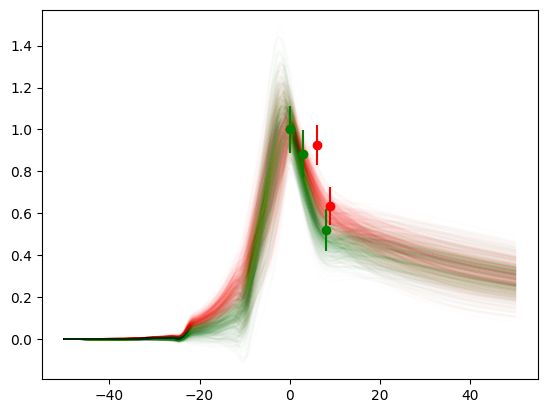

1


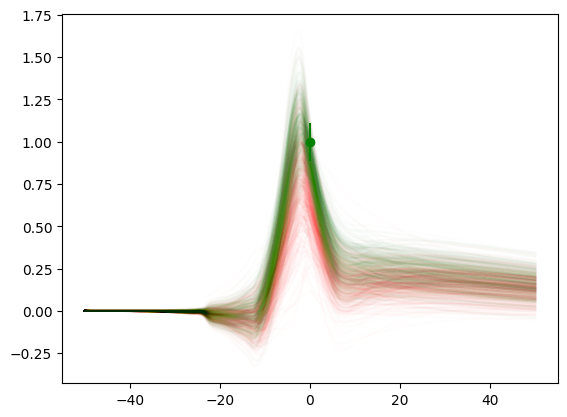

2


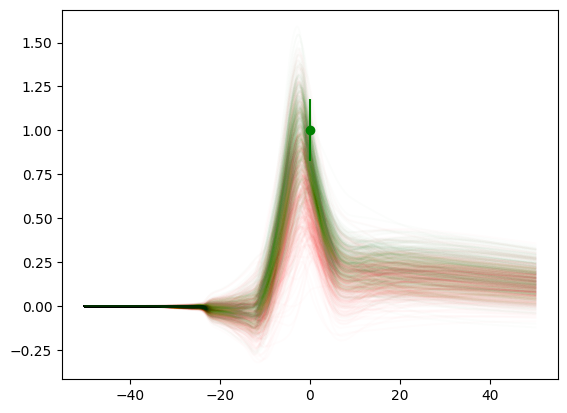

3


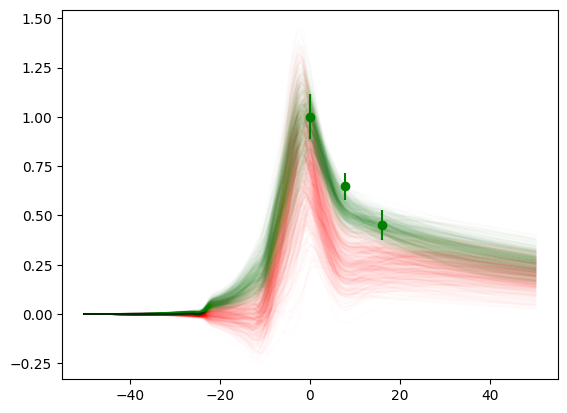

4


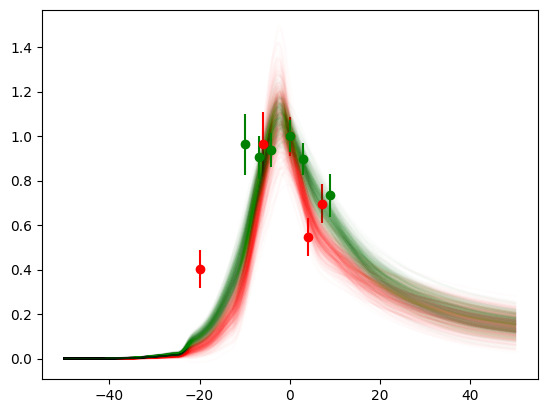

5


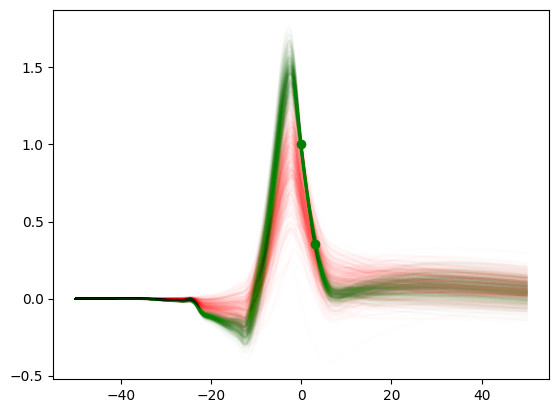

6


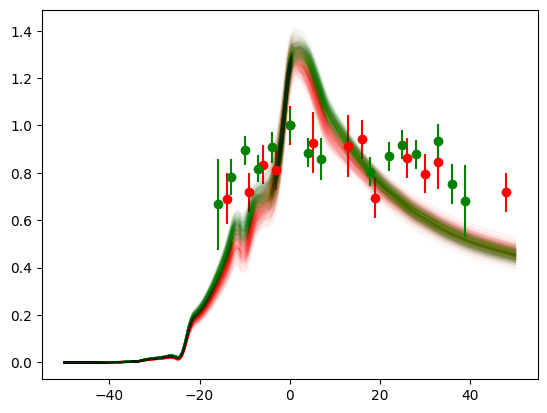

7


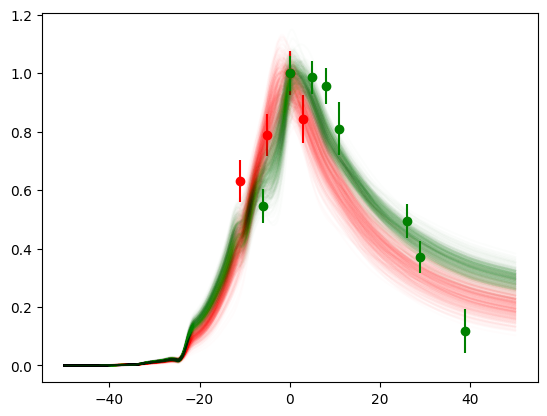

8


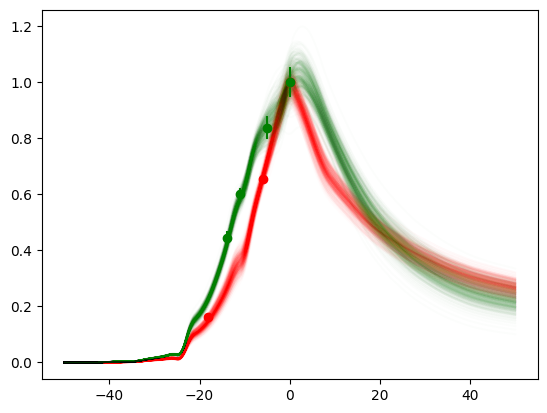

9


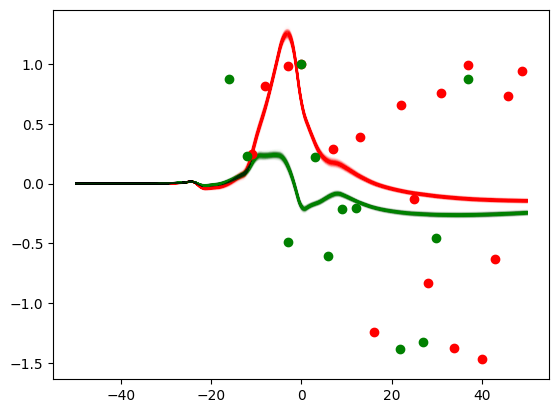

In [27]:
colors = ['r', 'g']
for event_num in range(len(index)):
    print(event_num)
    plt.figure()
    object_df = new_object_df[new_object_df['object_index']==event_num]
    for band in range(2):
        for sample_no in range(100):
            for chain_num in range(4):
                c1 = mcmc_samples.coeffs[sample_no, chain_num, event_num, 0 + band*3]
                c2 = mcmc_samples.coeffs[sample_no, chain_num, event_num, 1 + band*3]
                c3 = mcmc_samples.coeffs[sample_no, chain_num, event_num, 2 + band*3]
                
                predictions = parametric_fn_pcs(c1, c2, c3, pcs, np.arange(0,401, 1))
                plt.plot(np.arange(-50, 50.25, .25), predictions, alpha=.01, color=colors[band])


        band_df = object_df[object_df['band_index']==band]
        plt.errorbar(band_df["time"], band_df["flux"], yerr=band_df["fluxerr"], fmt="o", color=colors[band])
        
    if event_num==9:
        break
    
    plt.show()